In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
image = cv2.imread('yoda.png',0)
rows, cols = image.shape
#plt.imshow(image, 'gray')

In [3]:
def DD(u,v):
    global rows, cols
    return math.sqrt((u-rows/2)**2+(v-cols/2)**2)

In [4]:
def IdealLowFilter(D0):
    global rows, cols
    idealLowFilter = np.zeros((rows,cols),np.float32)
    for x in range (rows):
        for y in range (cols):
            if DD(x,y)<=D0:
                idealLowFilter[x][y] = 1
    return idealLowFilter

In [5]:
def IdealHighFilter(D0):
    global rows, cols
    idealHighFilter = np.zeros((rows,cols),np.float32)
    for x in range (rows):
        for y in range (cols):
            if DD(x,y)>D0:
                idealHighFilter[x][y] = 1
            else:
                idealHighFilter[x][y] = 0
    return idealHighFilter

In [6]:
def ButterworthLowFilter(D0,n):
    global rows, cols
    butterworthLowFilter = np.zeros((rows,cols),np.float32)
    for x in range (rows):
        for y in range (cols):
            butterworthLowFilter[x][y] = 1/(1+(DD(x,y)/D0)**(2*n))
    return butterworthLowFilter

In [7]:
def ButterworthHighFilter(D0,n):
    global rows, cols
    butterworthHighFilter = np.zeros((rows,cols),np.float32)
    for x in range (rows):
        for y in range (cols):
            butterworthHighFilter[x][y] = 1-1/(1+(DD(x,y)/D0)**(2*n))
    return butterworthHighFilter

In [8]:
def GaussianLowFilter(D0):
    global rows, cols
    gaussianLowFilter = np.zeros((rows,cols),np.float32)
    for x in range (rows):
        for y in range (cols):
            gaussianLowFilter[x][y] = math.exp((-1*DD(x,y)**2)/((D0**2)*2))
    return gaussianLowFilter

In [9]:
def GaussianHighFilter(D0):
    global rows, cols
    gaussianHighFilter = np.zeros((rows,cols),np.float32)
    for x in range (rows):
        for y in range (cols):
            gaussianHighFilter[x][y] = 1-math.exp((-1*DD(x,y)**2)/((D0**2)*2))
    return gaussianHighFilter

In [10]:
def Spec(img):
    fft=np.fft.fft2(img)
    return np.fft.fftshift(fft)

In [11]:
def Result(img):
    result = np.abs(img)
    result -=result.min()
    return result*255/result.max()

In [12]:
def inverseFourier(img,mask):
    fshift = img * mask
    ifft_shift = np.fft.ifftshift(fshift)
    back = np.fft.ifft2(ifft_shift)
    return fshift, back

In [13]:
D=25

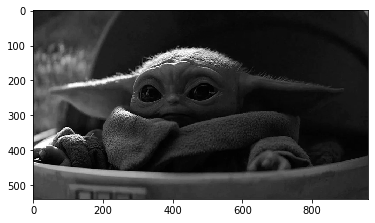

In [14]:
#Исходное изображение
plt.imshow(image, 'gray')

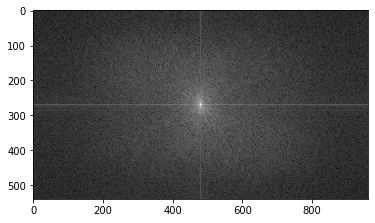

In [15]:
#Спект исходного изображения
OriginSpectr = Spec(image)
plt.imshow(np.abs(OriginSpectr)**0.1,'gray')

In [16]:
# Идеальный фильтр нижних частот

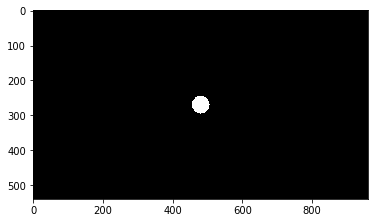

In [17]:
#Применение Идеальный фильтра нижних частот D = 50
idealLow = IdealLowFilter(D)
plt.imshow(np.abs(idealLow)**0.1,'gray')

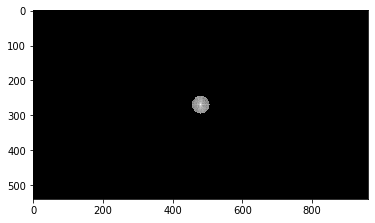

In [18]:
#
IdealLowMask, IdealLowback = inverseFourier(OriginSpectr,idealLow)
plt.imshow(np.abs(IdealLowMask)**0.1,'gray')

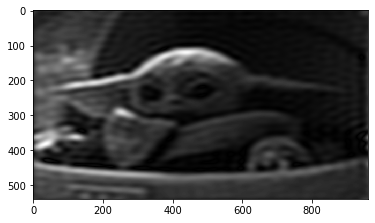

In [19]:
#Результирующее изображение после применения Идеального фильтра нижних частот
cv2.imwrite('IdealLow.png',Result(IdealLowback))
plt.imshow(Result(IdealLowback),'gray')

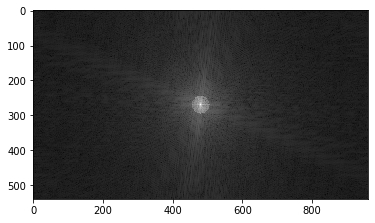

In [20]:
#Спектр изображение после применения Идеального фильтра нижних частот
IdealLowSpectr = Spec(Result(IdealLowback))
plt.imshow(np.abs(IdealLowSpectr)**0.1,'gray')

In [21]:
#Идеальный фильтр верхних частот

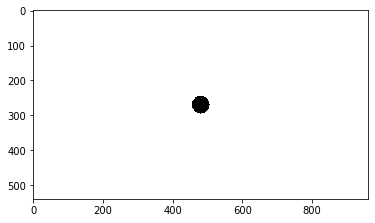

In [22]:
#Применение Идеальный фильтра нижних частот D = 50
idealHigh = IdealHighFilter(D)
plt.imshow(np.abs(idealHigh)**0.1,'gray')

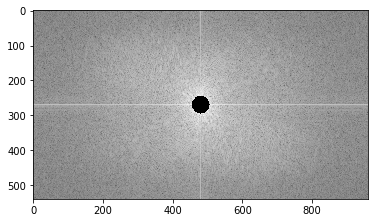

In [23]:
#
IdealHighMask, IdealHighback = inverseFourier(OriginSpectr,idealHigh)
plt.imshow(np.abs(IdealHighMask)**0.1,'gray')

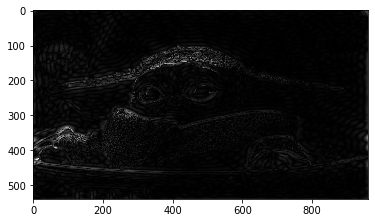

In [24]:
#Результирующее изображение после применения Идеального фильтра верхних частот
cv2.imwrite('idealHigh.png',Result(IdealHighback))
plt.imshow(Result(IdealHighback),'gray')

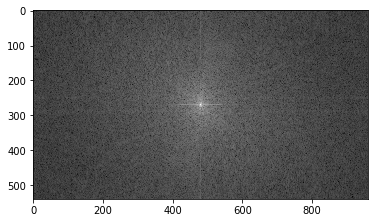

In [25]:
#Спектр изображение после применения Идеального фильтра верхних частот
IdealLowSpectr = Spec(Result(IdealHighback))
plt.imshow(np.abs(IdealLowSpectr)**0.1,'gray')

In [26]:
#Фильтр низких частот Баттерворта
n = 2

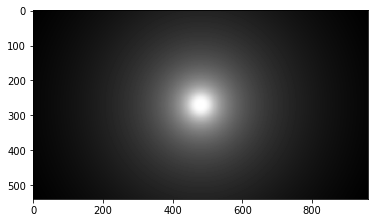

In [27]:
ButterworthLow = ButterworthLowFilter(D,n)
plt.imshow(np.abs(ButterworthLow)**0.1,'gray')

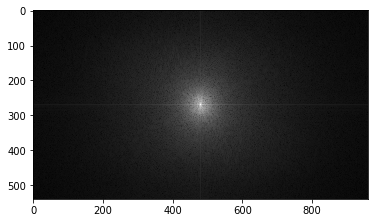

In [28]:
#
ButterworthLowMask, ButterworthLowback = inverseFourier(OriginSpectr,ButterworthLow)
plt.imshow(np.abs(ButterworthLowMask)**0.1,'gray')

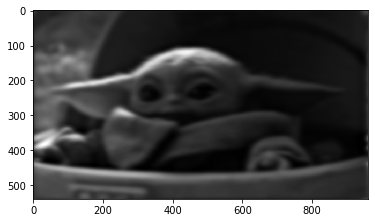

In [29]:
#Результирующее изображение после применения фильтра низких частот Баттерворта
cv2.imwrite('ButterworthLow.png',Result(ButterworthLowback))
plt.imshow(Result(ButterworthLowback),'gray')

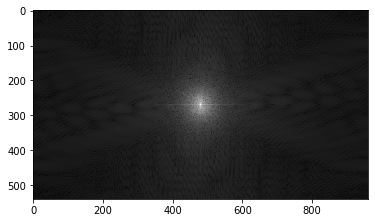

In [30]:
#Спектр изображение после применения фильтра низких частот Баттерворта
ButterworthLowSpectr = Spec(Result(ButterworthLowback))
plt.imshow(np.abs(ButterworthLowSpectr)**0.1,'gray')

In [31]:
#Фильтр высоких частот Баттерворта
# n = 2 

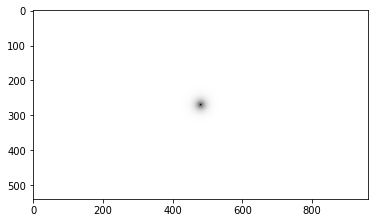

In [32]:
ButterworthHigh = ButterworthHighFilter(D,n)
plt.imshow(np.abs(ButterworthHigh)**0.1,'gray')

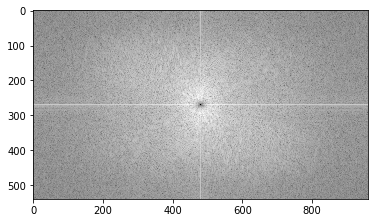

In [33]:
#
ButterworthHighMask, ButterworthHighback = inverseFourier(OriginSpectr,ButterworthHigh)
plt.imshow(np.abs(ButterworthHighMask)**0.1,'gray')

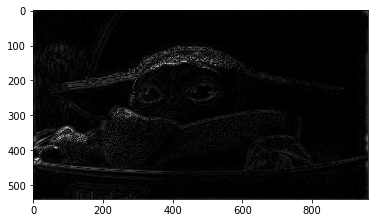

In [34]:
#Результирующее изображение после применения фильтра низких частот Баттерворта
cv2.imwrite('ButterworthHigh.png',Result(ButterworthHighback))
plt.imshow(Result(ButterworthHighback),'gray')

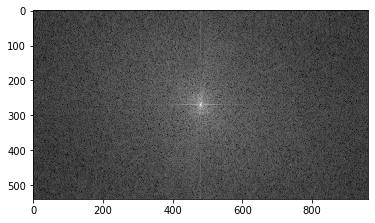

In [35]:
#Спектр изображение после применения фильтра высоких частот Баттерворта
ButterworthHighSpectr = Spec(Result(ButterworthHighback))
plt.imshow(np.abs(ButterworthHighSpectr)**0.1,'gray')

In [36]:
#Гауссов фильтр низких частот

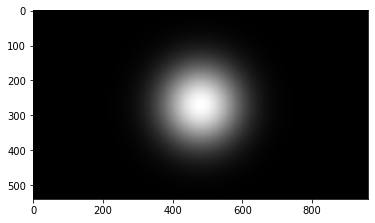

In [37]:
GaussianLow = GaussianLowFilter(D)
plt.imshow(np.abs(GaussianLow)**0.1,'gray')

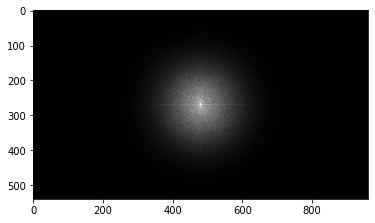

In [38]:
#
GaussianLowMask, GaussianLowback = inverseFourier(OriginSpectr,GaussianLow)
plt.imshow(np.abs(GaussianLowMask)**0.1,'gray')

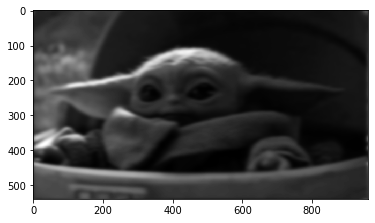

In [39]:
#Результирующее изображение после применения Гауссова фильтра низких частот
cv2.imwrite('GaussianLow.png',Result(GaussianLowback))
plt.imshow(Result(GaussianLowback),'gray')

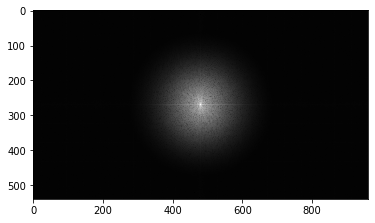

In [40]:
#Спектр изображение после применения Гауссова фильтра низких частот
GaussianLowSpectr = Spec(Result(GaussianLowback))
plt.imshow(np.abs(GaussianLowSpectr)**0.1,'gray')

In [41]:
#Гауссов фильтр высоких частот GaussianHighFilter

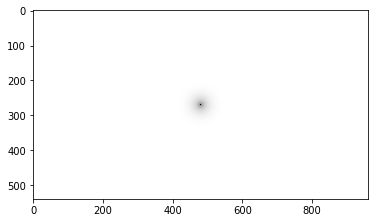

In [42]:
GaussianHigh = GaussianHighFilter(D)
plt.imshow(np.abs(GaussianHigh)**0.1,'gray')

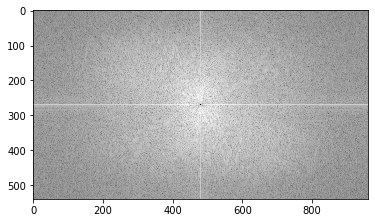

In [43]:
#
GaussianHighMask, GaussianHighback = inverseFourier(OriginSpectr,GaussianHigh)
plt.imshow(np.abs(GaussianHighMask)**0.1,'gray')

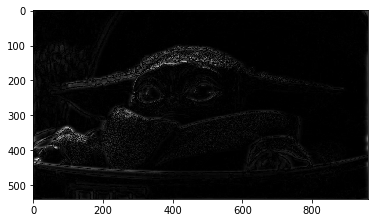

In [44]:
#Результирующее изображение после применения Гауссова фильтра высоких частот
cv2.imwrite('GaussianHigh.png',Result(GaussianHighback))
plt.imshow(Result(GaussianHighback),'gray')

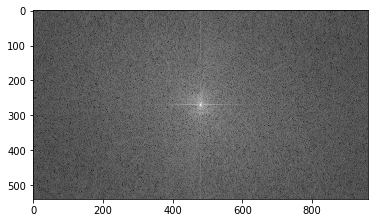

In [45]:
#Спектр изображение после применения Гауссова фильтра высоких частот
GaussianHighSpectr = Spec(Result(GaussianHighback))
plt.imshow(np.abs(GaussianHighSpectr)**0.1,'gray')